In [1427]:
import pandas as pd

df = pd.read_excel("indian_liver_patient.xlsx")

pd.set_option("display.max_columns", None)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [1428]:
df.Dataset.unique()

array([1, 2])

In [1429]:
df.duplicated().sum()

np.int64(13)

In [1430]:
df.duplicated(keep=False).unique().size

2

In [1431]:
df.drop_duplicates(keep="first", inplace=True)

In [1432]:
df.reset_index=True
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Preprocessing


In [1433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [1434]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

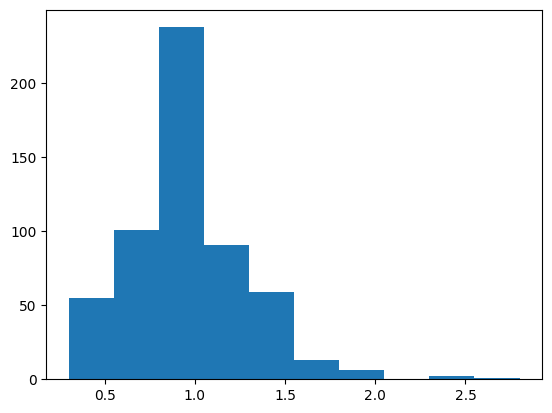

In [1435]:
#fill null values
import matplotlib.pyplot as plt
plt.hist(df.Albumin_and_Globulin_Ratio)
plt.show()

In [1436]:
df['Albumin_and_Globulin_Ratio'] =df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [1437]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [1438]:
#encoding teachniques

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])

In [1439]:
df.rename(columns={'Dataset':'Liver_disease'},inplace=True)

In [1440]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215640,-0.138093
Gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.085895,-0.091369,-0.005578,-0.078501
Total_Bilirubin,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207629,-0.224430
Direct_Bilirubin,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201394,-0.250666
Alkaline_Phosphotase,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236037,-0.187560
Alamine_Aminotransferase,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006523,-0.161917
Aspartate_Aminotransferase,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072882,-0.151101
Total_Protiens,-0.197052,-0.085895,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.233580,0.037794
Albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.684099,0.166835
Albumin_and_Globulin_Ratio,-0.215640,-0.005578,-0.207629,-0.201394,-0.236037,-0.006523,-0.072882,0.233580,0.684099,1.000000,0.170533


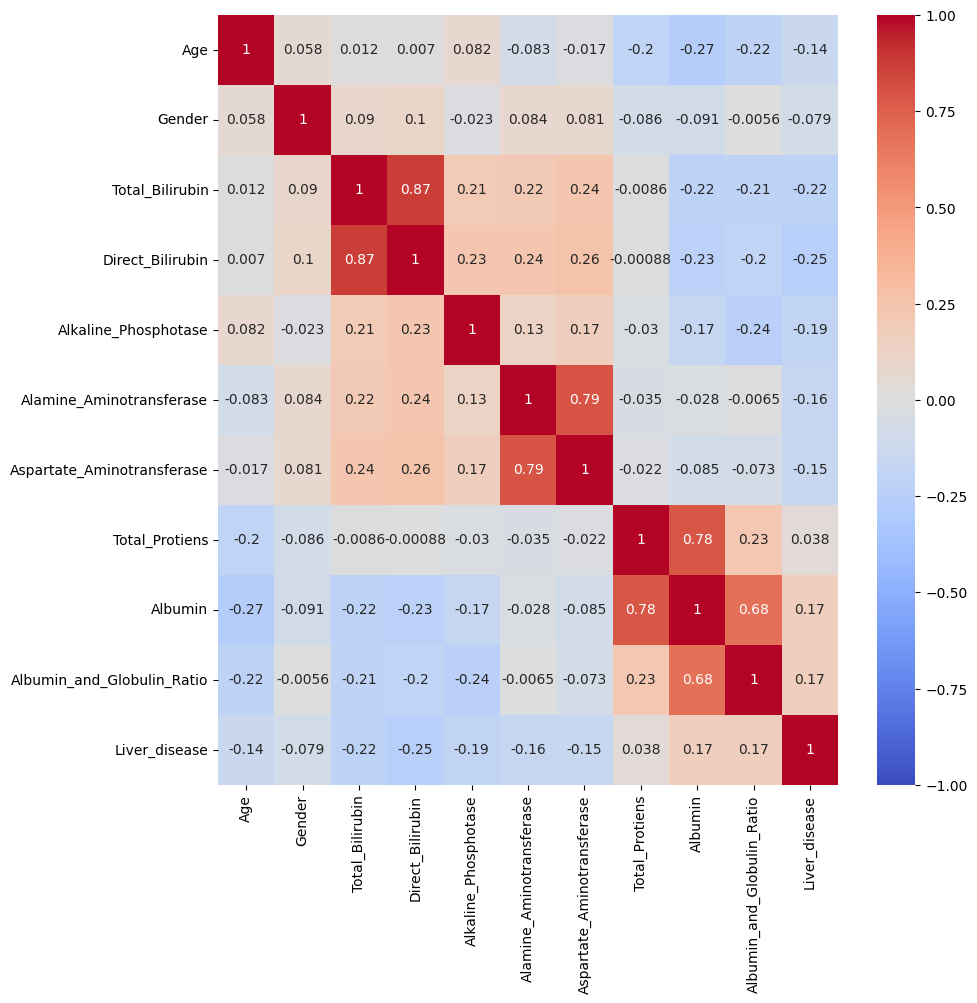

In [1441]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [1442]:
correlation_matrix = df.corr()

threshold = 0.1

target_column = "Liver_disease"


if target_column in correlation_matrix.columns:
    
    high_corr_columns = correlation_matrix[target_column][correlation_matrix[target_column].abs() > threshold].index.tolist()

    
    if target_column in high_corr_columns:
        high_corr_columns.remove(target_column)

    print("Columns with high correlation to the target column:", high_corr_columns)
else:
    print(f"Target column '{target_column}' not found in the correlation matrix.")


Columns with high correlation to the target column: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio']


In [1443]:
# df.drop('Total_Protiens',axis=1,inplace=True)

In [1444]:
# q1 = df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio','Liver_disease']].quantile(0.25)
# q3 = df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio','Liver_disease']].quantile(0.75)

In [1445]:
# q1

In [1446]:
# IQR = q3 - q1
# IQR

In [1447]:
# lower_bound = q1 -1.5 *IQR
# upper_bound = q3 +1.5 *IQR

In [1448]:
# df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio','Liver_disease']] =(df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio','Liver_disease']] >lower_bound) |(df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio','Liver_disease']] > upper_bound)

In [1449]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [1450]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_dict = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check if the values are outside the IQR range
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_dict[column] = outliers.any()
    
    return outlier_dict

# Run the function to detect outliers
outliers = detect_outliers_iqr(df)
print(outliers)


{'Age': np.False_, 'Gender': np.True_, 'Total_Bilirubin': np.True_, 'Direct_Bilirubin': np.True_, 'Alkaline_Phosphotase': np.True_, 'Alamine_Aminotransferase': np.True_, 'Aspartate_Aminotransferase': np.True_, 'Total_Protiens': np.True_, 'Albumin': np.False_, 'Albumin_and_Globulin_Ratio': np.True_, 'Liver_disease': np.False_}


In [1451]:
print("Columns with outliers using IQR:", [col for col, is_outlier in outliers.items() if is_outlier])
# print("Columns with outliers using Z-score:", [col for col, is_outlier in outliers_zscore.items() if is_outlier])


Columns with outliers using IQR: ['Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio']


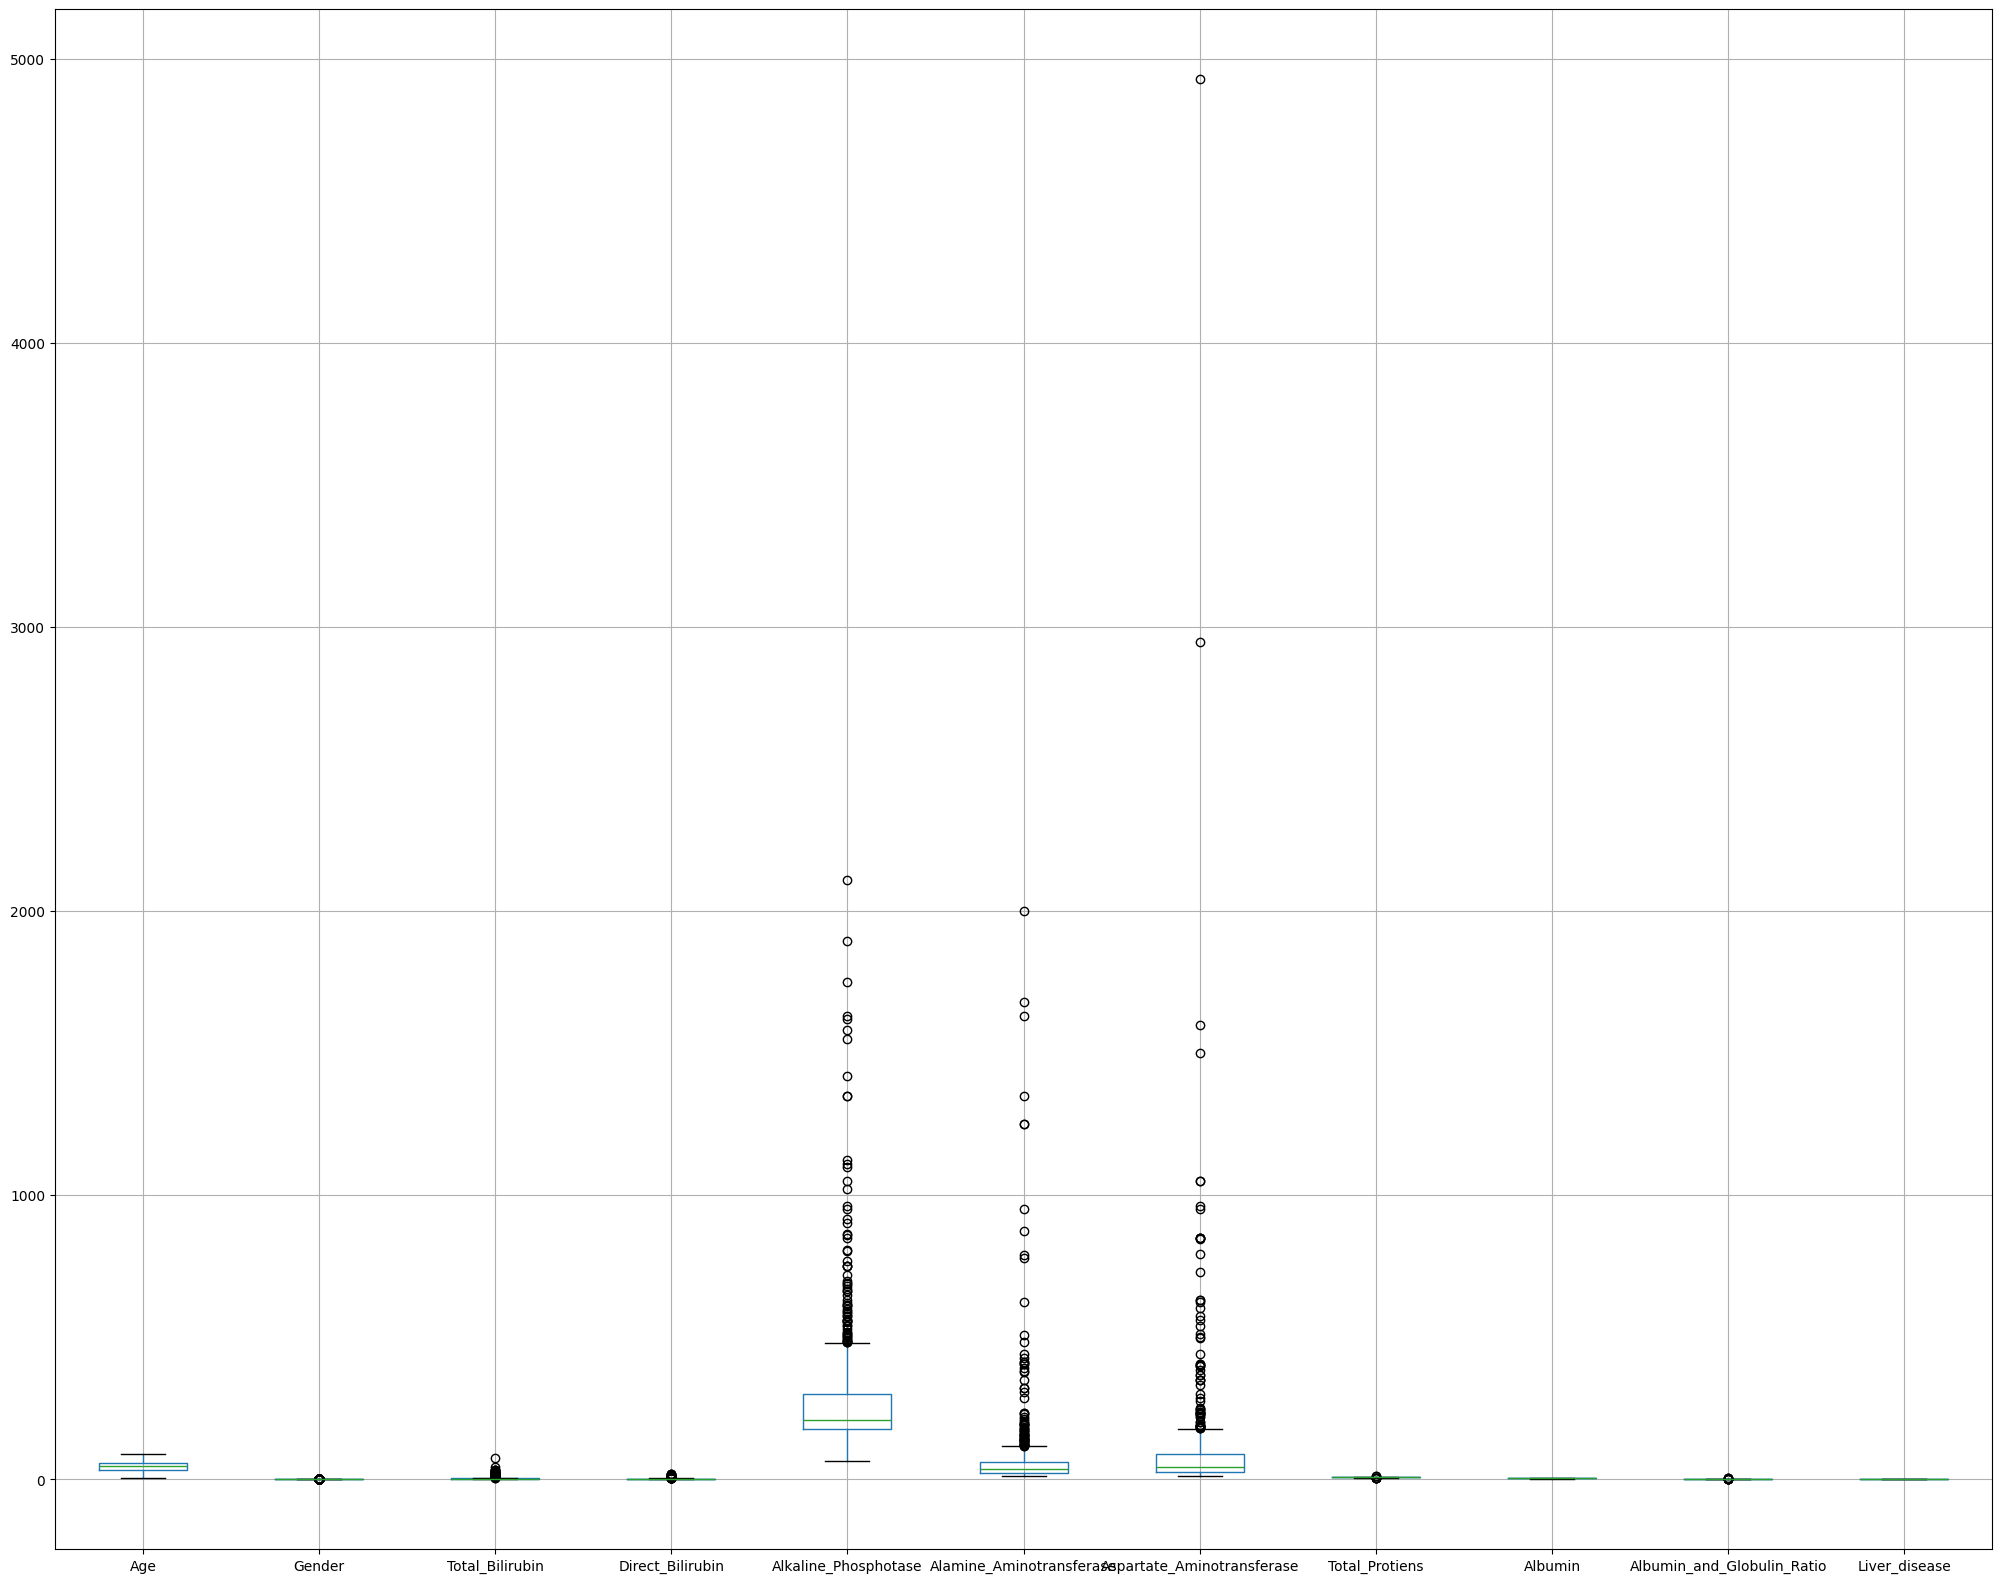

In [1452]:
import matplotlib.pyplot as plt

# Plot boxplot for numerical columns to visually inspect for outliers
df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(25, 20))
plt.show()


In [1453]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [1455]:
df =df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Albumin', 'Albumin_and_Globulin_Ratio','Liver_disease']]
df

,Age,Total_Bilirubin,Direct_Bilirubin,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0.7,0.1,3.3,0.90,1
1,62,10.9,5.5,3.2,0.74,1
2,62,7.3,4.1,3.3,0.89,1
3,58,1.0,0.4,3.4,1.00,1
4,72,3.9,2.0,2.4,0.40,1
...,...,...,...,...,...,...
578,60,0.5,0.1,1.6,0.37,2
579,40,0.6,0.1,3.2,1.10,1
580,52,0.8,0.2,3.2,1.00,1
581,31,1.3,0.5,3.4,1.00,1


In [1457]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,3.100000,0.948004,1.000000
75%,58.000000,2.600000,1.300000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,5.500000,2.800000,2.000000


In [1458]:
df.Liver_disease.value_counts()

In [1459]:
# Split the data into features and target

x = df.drop(['Liver_disease'],axis=1)
y= df['Liver_disease']

In [1460]:
x.shape,y.shape

((570, 5), (570,))

In [1461]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)


In [1462]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((456, 5), (114, 5), (456,), (114,))

In [ ]:
# import pandas as pd
# import numpy as np

# # # Load dataset (Ensure 'Liver_disease' is the target column)
# # df = pd.read_csv("your_dataset.csv")

# # # Separate features and target
# # x = df.drop(columns=['Liver_disease'])  # Features
# # y = df['Liver_disease']  # Target

# ### Compute IQR for Outlier Detection
# Q1 = x.quantile(0.25)  # 25th percentile
# Q3 = x.quantile(0.75)  # 75th percentile
# IQR = Q3 - Q1          # Interquartile Range

# # Define Outlier Boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# ### 2Remove Outliers
# x_cleaned = x[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]
# y_cleaned = y.loc[x_cleaned.index]  # Keep only corresponding target values

# # Print Before & After Shapes
# print("Original Shape:", x.shape)
# print("After Outlier Removal:", x_cleaned.shape)


In [1464]:
# Model Building
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [1465]:
#Model Evaluation

y_pred = lr.predict(x_test)

In [1466]:
lr.score(x_test,y_test)

0.8157894736842105

In [1467]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1])

In [1468]:
y_test

45     2
448    1
179    1
387    1
213    1
      ..
7      1
366    2
92     1
399    1
116    1
Name: Liver_disease, Length: 114, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

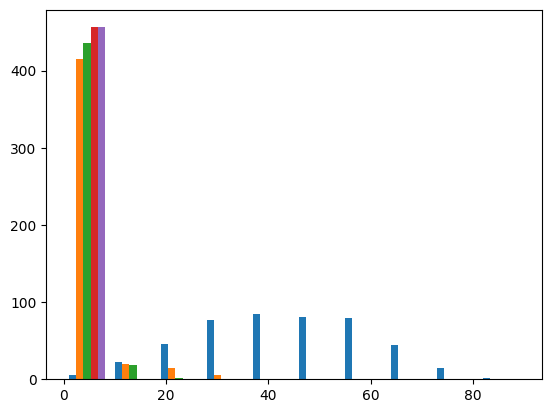

In [1469]:
import matplotlib.pyplot as plt

plt.hist(x_train)
plt.show

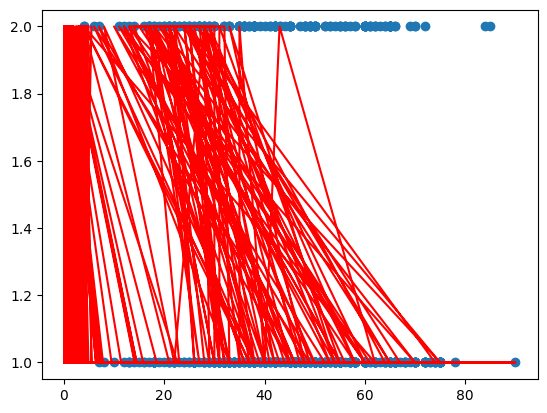

In [1470]:
import matplotlib.pyplot as plt

plt.scatter(x.iloc[:, 0],y)
plt.plot(x,lr.predict(x),color='red')
plt.show()

In [1471]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

con = confusion_matrix(y_test,y_pred)
con

array([[90,  1],
       [20,  3]])

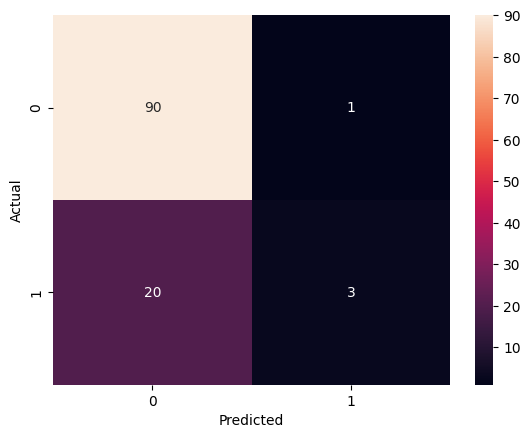

In [1472]:
sns.heatmap(con,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1473]:
acc = accuracy_score(y_test,y_pred)
acc

0.8157894736842105

In [1474]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.82      0.99      0.90        91
           2       0.75      0.13      0.22        23

    accuracy                           0.82       114
   macro avg       0.78      0.56      0.56       114
weighted avg       0.80      0.82      0.76       114



In [1478]:
#Model Saving

import pickle

with open('liver_disease_prediction.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10,n_estimators=20000)

rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20000)

In [1022]:
y_pred_rfc = rfc.predict(x_test)

In [1023]:
acc = accuracy_score(y_test,y_pred_rfc)
acc

0.7105263157894737

GridSearch-CV

In [1477]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=10000)
lr_params = {
    'C': [0.001, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],  # 'saga' solver might work better for large datasets
    'class_weight': ['balanced', None]  # Consider handling class imbalance
}

# Decision Tree Model
dc_model = DecisionTreeClassifier()
dc_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  # Add min_samples_leaf to avoid overfitting
    'class_weight': ['balanced', None]  # Handle imbalanced classes
}

# KNN Model
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [2, 5, 8, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Trying different distance metrics
}

# Random Forest Model (Alternative)
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Handle imbalanced classes
}

# Apply GridSearchCV for Logistic Regression
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(x_train, y_train)

# Apply GridSearchCV for Decision Tree
dc_grid = GridSearchCV(dc_model, dc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dc_grid.fit(x_train, y_train)

# Apply GridSearchCV for KNN
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid.fit(x_train, y_train)

# Apply GridSearchCV for Random Forest (Alternative Model)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(x_train, y_train)

# Print best results
print(f'Best Params from Logistic Regression: {lr_grid.best_params_}')
print(f'Best Score from Logistic Regression: {lr_grid.best_score_}')

print(f'Best Params from Decision Tree: {dc_grid.best_params_}')
print(f'Best Score from Decision Tree: {dc_grid.best_score_}')

print(f'Best Params from KNN: {knn_grid.best_params_}')
print(f'Best Score from KNN: {knn_grid.best_score_}')

print(f'Best Params from Random Forest: {rf_grid.best_params_}')
print(f'Best Score from Random Forest: {rf_grid.best_score_}')

# You can also predict the test set and evaluate using classification report or confusion matrix
from sklearn.metrics import classification_report, accuracy_score

y_pred_lr = lr_grid.predict(x_test)
print(f"Logistic Regression Accuracy on Test Set: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

y_pred_dc = dc_grid.predict(x_test)
print(f"Decision Tree Accuracy on Test Set: {accuracy_score(y_test, y_pred_dc)}")
print(classification_report(y_test, y_pred_dc))

y_pred_knn = knn_grid.predict(x_test)
print(f"KNN Accuracy on Test Set: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

y_pred_rf = rf_grid.predict(x_test)
print(f"Random Forest Accuracy on Test Set: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Params from Logistic Regression: {'C': 0.001, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best Score from Logistic Regression: 0.6951982799808887
Best Params from Decision Tree: {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score from Decision Tree: 0.68865265169613
Best Params from KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score from KNN: 0.6952221691352125
Best Params from Random Forest: {'class_weight': None, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score from Random Forest: 0.6886287625418059
Logistic Regression Accuracy on Test Set: 0.7982456140350878
              precision    recall  f1-score

In [602]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [603]:
lr_model = LogisticRegression()
lr_params = {
    'C':[0.001,0.1,1,10,100],
    'penalty':['l2'],
    'solver':['lbfgs','liblinear']
}

dc_model = DecisionTreeClassifier()
dc_params = {
    'max_depth':[3,5,10],
    'min_samples_split':[2,5,10]
}

knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors':[2,5,8],
    'weights':['uniform','distance']
}

In [604]:
lr_grid = GridSearchCV(lr_model,lr_params,cv=5,scoring= 'accuracy')
dc_grid = GridSearchCV(dc_model,dc_params,cv=5,scoring='accuracy')
knn_grid = GridSearchCV(knn_model,knn_params,cv=5,scoring='accuracy')

In [605]:
lr_grid.fit(x_train,y_train)
dc_grid.fit(x_train,y_train)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [606]:
print(f'best Param from Logistic regression {lr_grid.best_params_} ')
print(f'best Score from Logistic regression {lr_grid.best_score_} ')

best Param from Logistic regression {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} 
best Score from Logistic regression 0.697372193024367 


In [607]:
print(f'best Param from Decision regression {dc_grid.best_params_} ')
print(f'best Score from Decision regression {dc_grid.best_score_} ')

best Param from Decision regression {'max_depth': 3, 'min_samples_split': 10} 
best Score from Decision regression 0.706091734352604 


In [608]:
print(f'best Param from KNN regression {knn_grid.best_params_} ')
print(f'best Score from KNN regression {knn_grid.best_score_} ')

best Param from KNN regression {'n_neighbors': 2, 'weights': 'uniform'} 
best Score from KNN regression 0.6951743908265647 


In [430]:
# Baggging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
Bagging = BaggingClassifier(estimator=log,n_estimators=100,random_state=42)

Bagging.fit(x_train,y_train)



BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [431]:
y_pred_bag = Bagging.predict(x_test)

In [432]:
acc_bag = accuracy_score(y_test,y_pred_bag)
acc_bag

0.7982456140350878

In [433]:
#Boosting Techniques

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=200,  # Increased estimators
    learning_rate=0.05,  # Slightly higher learning rate
    max_depth=4,  # More depth for better learning
    min_samples_split=5,  # Control overfitting
    min_samples_leaf=5,  # Prevent overfitting
    subsample=0.8,  # Use a fraction of data for each tree
    random_state=2
)

gbc.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=200,
                           random_state=2, subsample=0.8)

In [434]:
y_pred_gbc = gbc.predict(x_test)

In [435]:
acc_gbc = accuracy_score(y_test,y_pred_gbc)
acc_gbc

0.6842105263157895

In [436]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

con = confusion_matrix(y_test,y_pred_gbc)
con

array([[74, 17],
       [19,  4]])

In [437]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=2), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}


In [438]:
acc_grid = accuracy_score(y_test, grid_search.predict(x_test))
acc_grid

0.7894736842105263

In [439]:
df

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,187,16,6.8,0.90,1
1,62,1,10.9,699,64,7.5,0.74,1
2,62,1,7.3,490,60,7.0,0.89,1
3,58,1,1.0,182,14,6.8,1.00,1
4,72,1,3.9,195,27,7.3,0.40,1
...,...,...,...,...,...,...,...,...
578,60,1,0.5,500,20,5.9,0.37,2
579,40,1,0.6,98,35,6.0,1.10,1
580,52,1,0.8,245,48,6.4,1.00,1
581,31,1,1.3,184,29,6.8,1.00,1


XG

In [440]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming X contains features and y contains the target (1 = Diseased, 2 = Healthy)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Convert y_train and y_test to binary labels (0 for Healthy, 1 for Diseased)
y_train = np.where(y_train == 2, 0, 1)
y_test = np.where(y_test == 2, 0, 1)


In [441]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],  # Controls tree complexity
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (for controlling overfitting)
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction for split
    'reg_lambda': [0, 1, 10],  # L2 regularization (prevents overfitting)
    'reg_alpha': [0, 1, 10]  # L1 regularization (adds sparsity)
}


In [442]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=2)

grid_search = GridSearchCV(
    estimator=xgb_clf, 
    param_grid=param_grid, 
    cv=3,  # 3-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1,  # Use all CPU cores
    verbose=1  # Show progress
)

grid_search.fit(X_train, y_train)

# Get Best Parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.7}


In [443]:
best_params = grid_search.best_params_

xgb_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=2)
xgb_best.fit(X_train, y_train)

# Predict and Evaluate
y_pred = xgb_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized XGBoost Accuracy:", accuracy)


Optimized XGBoost Accuracy: 0.7017543859649122
